# Details of project members

####**Name: Archana Kalburgi**
####**CWID: 10469491**
####**Name: Arya Guddemane Vishwakumar**
####**CWID: 10459529**

# **Project Title: Sentiment Analysis for IMDB Movie Reviews**
#### Part 2 
#### Part 1 in imdb_baseline.ipynb file


# Exploration


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns     
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded_file = files.upload()
uploaded_file

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
!python -V

Python 3.7.10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/MLProject_personal/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df2 = df.copy()
df2['sentiment'] = df2['sentiment'].replace(['positive','negative'],[1,0])

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
train, test = train_test_split(df2, test_size=0.5, random_state=1)

In [ ]:
len(test)

25000

In [ ]:
train_compressed = train.sample(1000)
test_compressed = test.sample(n=500)
test_compressed

,review,sentiment
45143,"It hurt to watch this movie, it really did... ...",0
8238,Little Dieter Needs to Fly was my first film d...,1
36354,Ocean's 12<br /><br />'If you steal fifty mill...,1
15624,Susan Sarandon and Natalie Portman play Adele ...,1
14604,I am a big fan of Fred MacMurray and Carole Lo...,0
...,...,...
15114,"A beautiful new print of ""Zabriskie Point"" is ...",1
13741,I LOVE this movie. and Disney channel is ridic...,1
21212,What is very French about this film is the tim...,1
31416,This tale of the upper-classes getting their c...,0


Text(0.5, 0, '')

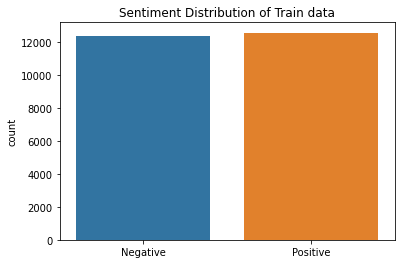

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.countplot(x = "sentiment", data=train) 
plot.set_title("Sentiment Distribution of Train data")
plot.set_xticklabels(["Negative", "Positive"]) 
plt.xlabel("")

Text(0.5, 0, '')

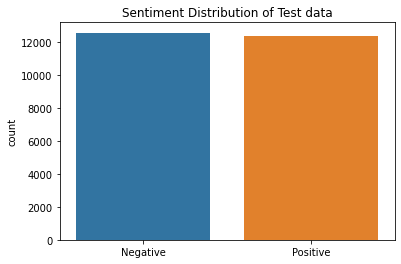

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.countplot(x = "sentiment", data=test) 
plot.set_title("Sentiment Distribution of Test data")
plot.set_xticklabels(["Negative", "Positive"]) 
plt.xlabel("")

In [ ]:
train_compressed

,review,sentiment
39541,For those who'd like to see this movie? I'd sa...,0
45789,"A stale ""misfits-in-the-army"" saga, which half...",0
46457,The premise for Circle of Two is an intriguing...,0
24706,There is a really good movie lurking just bene...,0
8475,This movie is incredible. If you have the chan...,1
...,...,...
23062,This is one of my favourite kung-fu films and ...,1
11111,My friend & I rented this movie and within the...,0
37664,"This is a beautiful, yet simple movie about on...",1
49035,I've been a fan of Rachael's since the beginni...,1


In [ ]:
raw_reviews_train = []
for rev in train_compressed['review']:
    raw_reviews_train.append(rev)
# clean_reviews_train = clean_reviews_train[0:100]

In [ ]:
len(raw_reviews_train) # one big list of 25000 "review" strings

500

In [ ]:
raw_reviews_test = []
for review in test_compressed['review']:
    raw_reviews_test.append(review) 
# clean_reviews_test = clean_reviews_test[0:100]

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

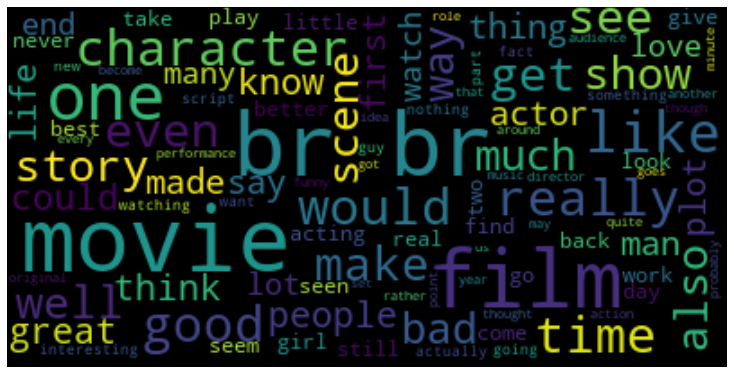

In [ ]:
text = " ".join(review for review in train_compressed['review']) 
# wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords=stopwords.words("english")).generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

# Clean data  and Feature Extraction


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns     
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')

analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# clean and apply sentiment analyzer and compare graphs
import re
from bs4 import BeautifulSoup

# Removing the html tags
def view_differences(input_df, column_name):
  sentiment = input_df[column_name].apply(lambda x: analyzer.polarity_scores(x))
  output_df = pd.concat([input_df,sentiment.apply(pd.Series)],1)
  output_df['sentiment_type']=''
  output_df.loc[output_df.compound>0,'sentiment_type']='positive'
  output_df.loc[output_df.compound==0,'sentiment_type']='neutral'
  output_df.loc[output_df.compound<0,'sentiment_type']='negative' 

# output_df.sentiment.value_counts().plot(kind='bar',title="before sentiment analysis")
  output_df.sentiment_type.value_counts().plot(kind='bar',title="after sentiment analysis")
  differences = output_df[output_df['sentiment']!=output_df['sentiment_type']]
  same_sentiments = output_df[output_df['sentiment']==output_df['sentiment_type']]
  print(len(differences))
  return output_df, same_sentiments

def strip_html(html_str):
    soup = BeautifulSoup(html_str)
    return soup.get_text()

def remove_non_words(text):
    return re.sub('\W+', ' ', text)

def clean(text):
  text = strip_html(text)
  text = remove_non_words(text)
  return text


In [ ]:
df.head()

# Define DataSet Length 



3016


(                                                 review  ... sentiment_type
 0     One of the other reviewers has mentioned that ...  ...       negative
 1     A wonderful little production. <br /><br />The...  ...       positive
 2     I thought this was a wonderful way to spend ti...  ...       positive
 3     Basically there's a family where a little boy ...  ...       negative
 4     Petter Mattei's "Love in the Time of Money" is...  ...       positive
 ...                                                 ...  ...            ...
 9995  Fun, entertaining movie about WWII German spy ...  ...       positive
 9996  Give me a break. How can anyone say that this ...  ...       positive
 9997  This movie is a bad movie. But after watching ...  ...       negative
 9998  This is a movie that was probably made to ente...  ...       negative
 9999  Smashing film about film-making. Shows the int...  ...       positive
 
 [10000 rows x 7 columns],
                                               

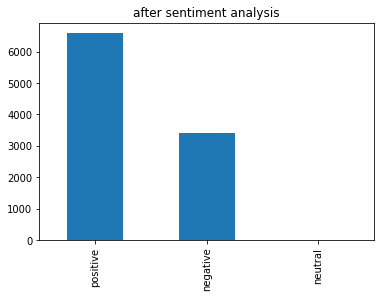

In [ ]:
# orginal set
df = df.iloc[:10000]
view_differences(df,"review")

In [ ]:
clean_data1= df.copy()
clean_data1['review_clean'] = clean_data1['review'].apply(lambda x: clean(x))

In [ ]:
clean_data1

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is a...
...,...,...,...
4995,An interesting slasher film with multiple susp...,negative,An interesting slasher film with multiple susp...
4996,i watched this series when it first came out i...,positive,i watched this series when it first came out i...
4997,Once again Jet Li brings his charismatic prese...,positive,Once again Jet Li brings his charismatic prese...
4998,"I rented this movie, after hearing Chris Gore ...",negative,I rented this movie after hearing Chris Gore s...


3006
10000
6994


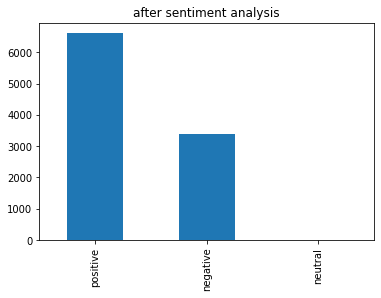

In [ ]:
clean_data1, similar_sentiments = view_differences(clean_data1, "review_clean")
print(len(clean_data1))
print(len(similar_sentiments)) 

In [ ]:
similar_sentiments

,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.054,0.760,0.186,0.9693,positive
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.105,0.651,0.244,0.9813,positive
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...,0.135,0.777,0.087,-0.8645,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is a...,0.052,0.791,0.157,0.9766,positive
5,"Probably my all-time favorite movie, a story o...",positive,Probably my all time favorite movie a story of...,0.017,0.761,0.222,0.9828,positive
...,...,...,...,...,...,...,...,...
9993,"After CITIZEN KANE in 1941, Hollywood executiv...",positive,After CITIZEN KANE in 1941 Hollywood executive...,0.076,0.798,0.125,0.9926,positive
9994,"First off, this is the worst movie I've ever s...",negative,First off this is the worst movie I ve ever se...,0.204,0.645,0.151,-0.8785,negative
9995,"Fun, entertaining movie about WWII German spy ...",positive,Fun entertaining movie about WWII German spy J...,0.107,0.698,0.195,0.9649,positive
9997,This movie is a bad movie. But after watching ...,negative,This movie is a bad movie But after watching a...,0.145,0.738,0.117,-0.8150,negative


In [ ]:
clean_data1 = similar_sentiments.copy()
clean_data1

,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.054,0.760,0.186,0.9693,positive
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.105,0.651,0.244,0.9813,positive
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...,0.135,0.777,0.087,-0.8645,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is a...,0.052,0.791,0.157,0.9766,positive
5,"Probably my all-time favorite movie, a story o...",positive,Probably my all time favorite movie a story of...,0.017,0.761,0.222,0.9828,positive
...,...,...,...,...,...,...,...,...
9993,"After CITIZEN KANE in 1941, Hollywood executiv...",positive,After CITIZEN KANE in 1941 Hollywood executive...,0.076,0.798,0.125,0.9926,positive
9994,"First off, this is the worst movie I've ever s...",negative,First off this is the worst movie I ve ever se...,0.204,0.645,0.151,-0.8785,negative
9995,"Fun, entertaining movie about WWII German spy ...",positive,Fun entertaining movie about WWII German spy J...,0.107,0.698,0.195,0.9649,positive
9997,This movie is a bad movie. But after watching ...,negative,This movie is a bad movie But after watching a...,0.145,0.738,0.117,-0.8150,negative


In [ ]:
# Most Common Words
clean_data1['temp_list'] = clean_data1['review_clean'].apply(lambda x:str(x).split())
top = Counter([item for sublist in clean_data1['temp_list'] for item in sublist])
common = pd.DataFrame(top.most_common(20))

common.columns = ['common_words','count']
common.style.background_gradient(cmap='Purples')

,common_words,count
0,the,79443
1,and,43690
2,a,42893
3,of,39556
4,to,36057
5,is,29744
6,in,24220
7,I,22558
8,it,21457
9,that,18784


In [ ]:
# remove stop words
def remove_stopword(x):
    stop_words_set =  set(stopwords.words('english'))
    return [word for word in x if word.lower() not in stop_words_set ]
clean_data1['review_clean_removed_stop_words_list'] = clean_data1['temp_list'].apply(lambda x: remove_stopword(x))
clean_data1['review_clean_removed_stop_words'] = clean_data1['temp_list'].apply(lambda x: ' '.join(remove_stopword(x)))

In [ ]:
top = Counter([item for sublist in clean_data1['review_clean_removed_stop_words_list'] for item in sublist])
common = pd.DataFrame(top.most_common(20))
common.columns = ['common_words','count']
common.style.background_gradient(cmap='Purples')

,common_words,count
0,movie,12098
1,film,10768
2,one,6785
3,like,5085
4,good,3823
5,time,3489
6,would,3302
7,see,3123
8,story,3112
9,even,2986


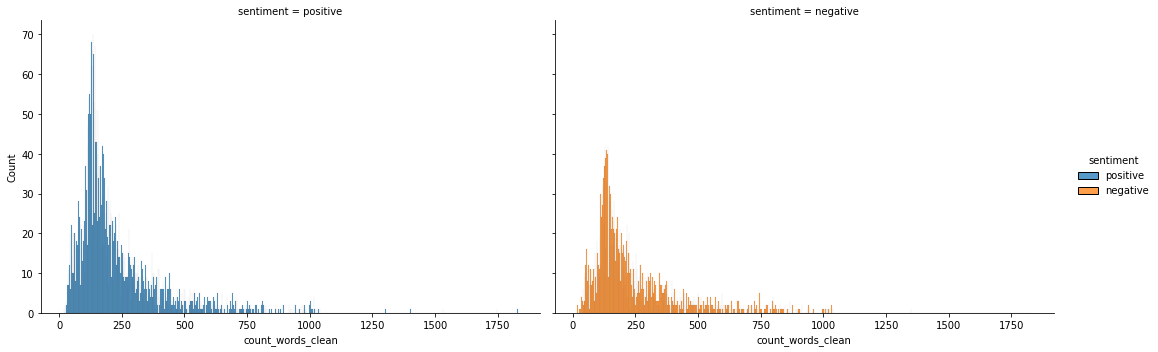

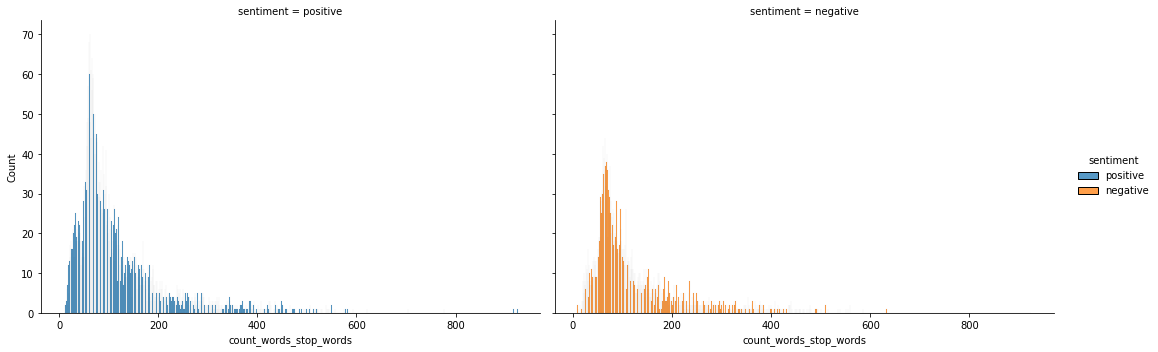

In [ ]:
clean_data1['length_clean'] = clean_data1['review_clean'].apply(lambda x: len(x) - x.count(" "))
clean_data1['length_stop_words'] = clean_data1['review_clean_removed_stop_words'].apply(lambda x: len(x) - x.count(" "))

clean_data1['count_words_clean'] = clean_data1['review_clean'].apply(lambda x: len(x.split()))
sns.displot(data=clean_data1, x="count_words_clean", hue='sentiment', col="sentiment", bins=1000, multiple="dodge", aspect=1.5)

clean_data1['count_words_stop_words'] = clean_data1['review_clean_removed_stop_words'].apply(lambda x: len(x.split()))
sns.displot(data=clean_data1, x="count_words_stop_words", hue='sentiment', col="sentiment", bins=1500, multiple="dodge", aspect=1.5)

In [ ]:
def count_dots(text):
  return len([*re.finditer('(\.\.\.)+', text)])

def scores_classify(text):
  pattern = re.compile('(\d+)\/10\W')
  match = pattern.match(text)
  if match is None:
    return 0
  return int(match.group(1))

def count_repeating_characters(text):
  return len([*re.finditer('(.)\1{2,}', text)])

clean_data1['PUNC_EXCL'] = clean_data1['review'].apply(lambda x: x.count("!"))
clean_data1['PUNC_QUES'] = clean_data1['review'].apply(lambda x: x.count("?"))
clean_data1['PUNC_DOT'] = clean_data1['review'].apply(lambda x: count_dots(x))
clean_data1['SCORE_IN_REVIEW'] = clean_data1['review'].apply(lambda x: scores_classify(x))
clean_data1['COUNT_REPEAT_CHAR'] = clean_data1['review'].apply(lambda x: count_repeating_characters(x))

In [ ]:
# emoticons
# find emoticons
#[x.group() for x in re.finditer(r"((:|;|X|x)(-|'|\"|,)?[()D*])|[()D*](-|'|\"|,)?(:|;|X|x)|(<3)", text)]
# %‑?\) DRUNK Confused
# (\||B)(;)?(-|‑)\) Cool,[9] bored/yawning[10]
# (>|}|3)?(;|:)(-|‑)?(\)|3)  Evil,[5] devilish[9]
# (O|0|3)?(;|:)(-|‑)?(\)|3|\^) angel, saint
# :-\)\) very happy
# (;|:)(-|‑)?(\(|c|<|\[|\|\||\{) Frown,[4][5][6] sad,[9] angry,[7] pouting
# [x.group() for x in re.finditer(r"(;|:)(-|‑)?(\(|c|<|\[|\|\||\{|\@)", text)]
# [()D*](-|'|\"|,)?(:|;|X|x)|(<3)

def count_pos_emoticon_sentiment(text):
    positive_list = [x.group() for x in re.finditer(r"((:|;|X|x)(-|'|\"|,)?[)D*])|(\||B)(;)?(-|‑)\)|(>|}|3|0|O)?(:|;|8|x|X|=)(')?(-|‑|\^|o|c|‑|‑)?(\)|]|3|>|}|D|x|×|,|P|p|b|Þ|þ)", text)]
    return len(positive_list)

def count_neg_emoticon_sentiment(text):
    negative_list = [x.group() for x in re.finditer(r"(:(-|‑)?#+(\.)+)|(>|<|}|3|0|O)?(:|;|8|x|X|=)(')?(-|‑|\^|o|c|‑|‑)?(\(|c\s|<|\[|\|\||l|E|{|@|J|&|#|X)|((%|#)‑?\))|(D(-|‑)?(')?(=|8|X|:|;)\s)", text)]
    return len(negative_list)

clean_data1['EMOTICON_POS'] = clean_data1['review'].apply(lambda x: count_pos_emoticon_sentiment(x))
clean_data1['EMOTICON_NEG'] = clean_data1['review'].apply(lambda x: count_neg_emoticon_sentiment(x))

In [ ]:
clean_data1

,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type,temp_list,review_clean_removed_stop_words_list,review_clean_removed_stop_words,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.054,0.760,0.186,0.9693,positive,"[A, wonderful, little, production, The, filmin...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,781,571,160,86,1,0,0,0,0,0,0
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.105,0.651,0.244,0.9813,positive,"[I, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,713,490,168,85,0,1,0,0,0,0,0
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...,0.135,0.777,0.087,-0.8645,negative,"[Basically, there, s, a, family, where, a, lit...","[Basically, family, little, boy, Jake, thinks,...",Basically family little boy Jake thinks zombie...,557,373,135,66,2,0,1,0,0,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is a...,0.052,0.791,0.157,0.9766,positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...","[Petter, Mattei, Love, Time, Money, visually, ...",Petter Mattei Love Time Money visually stunnin...,1016,728,228,125,0,0,0,0,0,0,0
5,"Probably my all-time favorite movie, a story o...",positive,Probably my all time favorite movie a story of...,0.017,0.761,0.222,0.9828,positive,"[Probably, my, all, time, favorite, movie, a, ...","[Probably, time, favorite, movie, story, selfl...",Probably time favorite movie story selflessnes...,510,327,125,56,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,"After CITIZEN KANE in 1941, Hollywood executiv...",positive,After CITIZEN KANE in 1941 Hollywood executive...,0.076,0.798,0.125,0.9926,positive,"[After, CITIZEN, KANE, in, 1941, Hollywood, ex...","[CITIZEN, KANE, 1941, Hollywood, executives, t...",CITIZEN KANE 1941 Hollywood executives turned ...,3111,2199,696,369,0,0,0,0,0,0,0
9994,"First off, this is the worst movie I've ever s...",negative,First off this is the worst movie I ve ever se...,0.204,0.645,0.151,-0.8785,negative,"[First, off, this, is, the, worst, movie, I, v...","[First, worst, movie, ever, seen, may, make, w...",First worst movie ever seen may make want see ...,607,441,133,73,0,0,0,0,0,0,0
9995,"Fun, entertaining movie about WWII German spy ...",positive,Fun entertaining movie about WWII German spy J...,0.107,0.698,0.195,0.9649,positive,"[Fun, entertaining, movie, about, WWII, German...","[Fun, entertaining, movie, WWII, German, spy, ...",Fun entertaining movie WWII German spy Julie A...,692,499,156,89,2,0,1,0,0,0,0
9997,This movie is a bad movie. But after watching ...,negative,This movie is a bad movie But after watching a...,0.145,0.738,0.117,-0.8150,negative,"[This, movie, is, a, bad, movie, But, after, w...","[movie, bad, movie, watching, endless, series,...",movie bad movie watching endless series bad ho...,917,582,232,109,2,2,0,0,0,1,1


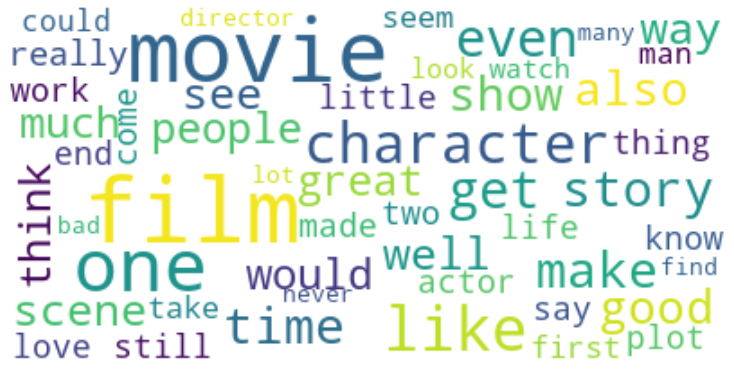

In [ ]:
text = " ".join(review for review in clean_data1["review_clean_removed_stop_words"]) 
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

In [ ]:
text = " ".join(review for review in df['review'])

In [ ]:
text

Output hidden; open in https://colab.research.google.com to view.

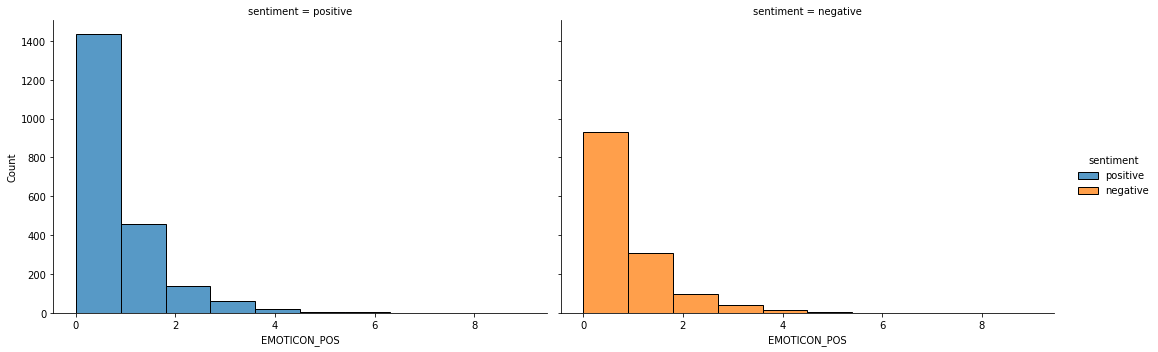

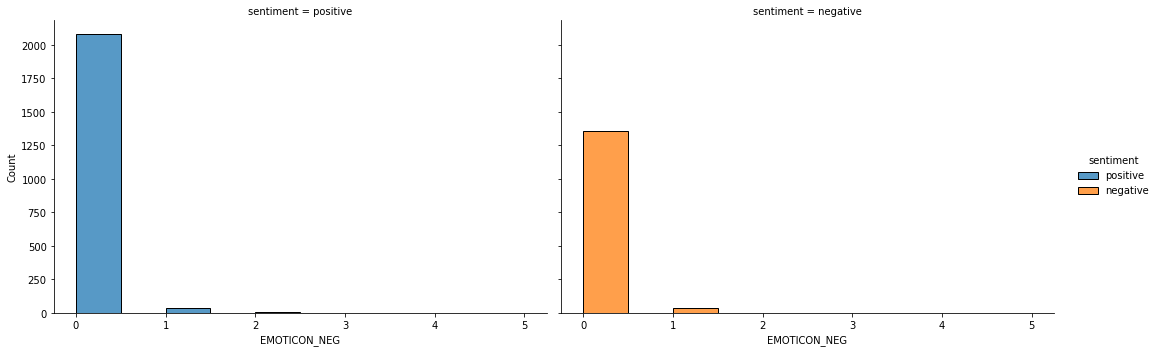

In [ ]:
# Emoticons Distribution

sns.displot(data=clean_data1, x="EMOTICON_POS", hue='sentiment', col="sentiment", bins=10, multiple="dodge", aspect=1.5)
sns.displot(data=clean_data1, x="EMOTICON_NEG", hue='sentiment', col="sentiment", bins=10, multiple="dodge", aspect=1.5)

# View All Features


In [ ]:
list(clean_data1.columns)

['review',
 'sentiment',
 'review_clean',
 'neg',
 'neu',
 'pos',
 'compound',
 'sentiment_type',
 'temp_list',
 'review_clean_removed_stop_words_list',
 'review_clean_removed_stop_words',
 'length_clean',
 'length_stop_words',
 'count_words_clean',
 'count_words_stop_words',
 'PUNC_EXCL',
 'PUNC_QUES',
 'PUNC_DOT',
 'SCORE_IN_REVIEW',
 'COUNT_REPEAT_CHAR',
 'EMOTICON_POS',
 'EMOTICON_NEG']

# Train and Test Dataset splits

In [ ]:
clean_data1.head()

,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type,temp_list,review_clean_removed_stop_words_list,review_clean_removed_stop_words,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.054,0.760,0.186,0.9693,positive,"[A, wonderful, little, production, The, filmin...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,781,571,160,86,1,0,0,0,0,0,0
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.105,0.651,0.244,0.9813,positive,"[I, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,713,490,168,85,0,1,0,0,0,0,0
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...,0.135,0.777,0.087,-0.8645,negative,"[Basically, there, s, a, family, where, a, lit...","[Basically, family, little, boy, Jake, thinks,...",Basically family little boy Jake thinks zombie...,557,373,135,66,2,0,1,0,0,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is a...,0.052,0.791,0.157,0.9766,positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...","[Petter, Mattei, Love, Time, Money, visually, ...",Petter Mattei Love Time Money visually stunnin...,1016,728,228,125,0,0,0,0,0,0,0
5,"Probably my all-time favorite movie, a story o...",positive,Probably my all time favorite movie a story of...,0.017,0.761,0.222,0.9828,positive,"[Probably, my, all, time, favorite, movie, a, ...","[Probably, time, favorite, movie, story, selfl...",Probably time favorite movie story selflessnes...,510,327,125,56,0,0,0,0,0,0,0


In [ ]:
# Labels Adjusted
clean_data1['sentiment'] = np.where(clean_data1['sentiment'] == "positive", 1, 0)
clean_data1.head()

,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type,temp_list,review_clean_removed_stop_words_list,review_clean_removed_stop_words,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
1,A wonderful little production. <br /><br />The...,1,A wonderful little production The filming tech...,0.054,0.760,0.186,0.9693,positive,"[A, wonderful, little, production, The, filmin...","[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,781,571,160,86,1,0,0,0,0,0,0
2,I thought this was a wonderful way to spend ti...,1,I thought this was a wonderful way to spend ti...,0.105,0.651,0.244,0.9813,positive,"[I, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...,713,490,168,85,0,1,0,0,0,0,0
3,Basically there's a family where a little boy ...,0,Basically there s a family where a little boy ...,0.135,0.777,0.087,-0.8645,negative,"[Basically, there, s, a, family, where, a, lit...","[Basically, family, little, boy, Jake, thinks,...",Basically family little boy Jake thinks zombie...,557,373,135,66,2,0,1,0,0,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,Petter Mattei s Love in the Time of Money is a...,0.052,0.791,0.157,0.9766,positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...","[Petter, Mattei, Love, Time, Money, visually, ...",Petter Mattei Love Time Money visually stunnin...,1016,728,228,125,0,0,0,0,0,0,0
5,"Probably my all-time favorite movie, a story o...",1,Probably my all time favorite movie a story of...,0.017,0.761,0.222,0.9828,positive,"[Probably, my, all, time, favorite, movie, a, ...","[Probably, time, favorite, movie, story, selfl...",Probably time favorite movie story selflessnes...,510,327,125,56,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
train_clean_data1, test_clean_data1 = train_test_split(clean_data1, test_size=0.5, random_state=1)
train_clean_data1.head()

,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type,temp_list,review_clean_removed_stop_words_list,review_clean_removed_stop_words,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
4363,Calling this a romantic comedy is accurate but...,1,Calling this a romantic comedy is accurate but...,0.110,0.709,0.181,0.9211,positive,"[Calling, this, a, romantic, comedy, is, accur...","[Calling, romantic, comedy, accurate, nowadays...",Calling romantic comedy accurate nowadays misl...,721,515,156,83,0,0,0,0,0,0,0
748,This movie came as a huge disappointment. The ...,0,This movie came as a huge disappointment The a...,0.243,0.631,0.125,-0.9562,negative,"[This, movie, came, as, a, huge, disappointmen...","[movie, came, huge, disappointment, anime, ser...",movie came huge disappointment anime series en...,592,411,134,68,0,1,0,0,0,1,0
7716,I saw the film and am very pleased to see a fi...,1,I saw the film and am very pleased to see a fi...,0.062,0.767,0.171,0.8588,positive,"[I, saw, the, film, and, am, very, pleased, to...","[saw, film, pleased, see, film, different, cha...",saw film pleased see film different character ...,444,325,98,51,0,0,0,0,0,2,0
4705,some would argue this is better mainly because...,0,some would argue this is better mainly because...,0.155,0.686,0.158,-0.3048,negative,"[some, would, argue, this, is, better, mainly,...","[would, argue, better, mainly, acting, indeed,...",would argue better mainly acting indeed far wo...,878,555,206,99,0,0,0,0,0,0,0
6464,I've already seen spin-offs of cartoons such a...,1,I ve already seen spin offs of cartoons such a...,0.032,0.854,0.114,0.9246,positive,"[I, ve, already, seen, spin, offs, of, cartoon...","[already, seen, spin, offs, cartoons, Flintsto...",already seen spin offs cartoons Flintstones Sc...,763,515,177,90,0,0,0,0,0,0,0


In [ ]:
# reset index to avoid Nan Values
train_clean_data1 = train_clean_data1.reset_index(drop=True)
test_clean_data1 = test_clean_data1.reset_index(drop=True)

In [ ]:
print("Training Set!")
print(len(train_clean_data1))
train_clean_data1.head()

Training Set!
3497


,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type,temp_list,review_clean_removed_stop_words_list,review_clean_removed_stop_words,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
0,Calling this a romantic comedy is accurate but...,1,Calling this a romantic comedy is accurate but...,0.110,0.709,0.181,0.9211,positive,"[Calling, this, a, romantic, comedy, is, accur...","[Calling, romantic, comedy, accurate, nowadays...",Calling romantic comedy accurate nowadays misl...,721,515,156,83,0,0,0,0,0,0,0
1,This movie came as a huge disappointment. The ...,0,This movie came as a huge disappointment The a...,0.243,0.631,0.125,-0.9562,negative,"[This, movie, came, as, a, huge, disappointmen...","[movie, came, huge, disappointment, anime, ser...",movie came huge disappointment anime series en...,592,411,134,68,0,1,0,0,0,1,0
2,I saw the film and am very pleased to see a fi...,1,I saw the film and am very pleased to see a fi...,0.062,0.767,0.171,0.8588,positive,"[I, saw, the, film, and, am, very, pleased, to...","[saw, film, pleased, see, film, different, cha...",saw film pleased see film different character ...,444,325,98,51,0,0,0,0,0,2,0
3,some would argue this is better mainly because...,0,some would argue this is better mainly because...,0.155,0.686,0.158,-0.3048,negative,"[some, would, argue, this, is, better, mainly,...","[would, argue, better, mainly, acting, indeed,...",would argue better mainly acting indeed far wo...,878,555,206,99,0,0,0,0,0,0,0
4,I've already seen spin-offs of cartoons such a...,1,I ve already seen spin offs of cartoons such a...,0.032,0.854,0.114,0.9246,positive,"[I, ve, already, seen, spin, offs, of, cartoon...","[already, seen, spin, offs, cartoons, Flintsto...",already seen spin offs cartoons Flintstones Sc...,763,515,177,90,0,0,0,0,0,0,0


In [ ]:
print("Test Set!")
print(len(test_clean_data1))
test_clean_data1.head()

Test Set!
3497


,review,sentiment,review_clean,neg,neu,pos,compound,sentiment_type,temp_list,review_clean_removed_stop_words_list,review_clean_removed_stop_words,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
0,I have read many comments on this site critici...,1,I have read many comments on this site critici...,0.081,0.727,0.192,0.9865,positive,"[I, have, read, many, comments, on, this, site...","[read, many, comments, site, criticizing, Blob...",read many comments site criticizing Blob chees...,1190,832,260,139,1,0,0,0,0,2,0
1,"Simply put, the only saving grace this movie h...",0,Simply put the only saving grace this movie ha...,0.097,0.843,0.060,-0.8240,negative,"[Simply, put, the, only, saving, grace, this, ...","[Simply, put, saving, grace, movie, settings, ...",Simply put saving grace movie settings costume...,978,655,238,119,1,2,0,0,0,0,0
2,Lot of silly plot holes in the film. First we ...,0,Lot of silly plot holes in the film First we s...,0.104,0.797,0.099,-0.7929,negative,"[Lot, of, silly, plot, holes, in, the, film, F...","[Lot, silly, plot, holes, film, First, see, wa...",Lot silly plot holes film First see watching m...,1587,1030,394,195,0,3,0,0,0,0,0
3,"So, has it really come to this? Are we, as con...",0,So has it really come to this Are we as consen...,0.131,0.755,0.113,-0.9190,negative,"[So, has, it, really, come, to, this, Are, we,...","[really, come, consenting, adults, blame, next...",really come consenting adults blame next gener...,3021,2025,662,325,0,3,0,0,0,2,0
4,Since I am required to write minimum of 10 lin...,0,Since I am required to write minimum of 10 lin...,0.144,0.799,0.057,-0.9703,negative,"[Since, I, am, required, to, write, minimum, o...","[Since, required, write, minimum, 10, lines, g...",Since required write minimum 10 lines garbage ...,1095,724,245,119,1,1,0,0,0,1,0


In [ ]:
train_clean_data1.describe()

,sentiment,neg,neu,pos,compound,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
count,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.0,3497.0,3497.000000,3497.000000
mean,0.623391,0.099533,0.747648,0.152820,0.263179,997.278810,686.998570,230.352016,117.305405,0.986274,0.618530,0.436660,0.0,0.0,0.503003,0.022877
std,0.484605,0.067547,0.071132,0.074282,0.846547,768.180687,541.537507,172.991117,89.972663,2.389990,1.477822,1.203805,0.0,0.0,0.903245,0.183852
min,0.000000,0.000000,0.430000,0.000000,-0.999400,75.000000,46.000000,18.000000,9.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.048000,0.702000,0.098000,-0.802000,535.000000,359.000000,127.000000,63.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1.000000,0.088000,0.750000,0.142000,0.876300,729.000000,501.000000,170.000000,86.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,1.000000,0.142000,0.797000,0.200000,0.979500,1211.000000,835.000000,279.000000,143.000000,1.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000
max,1.000000,0.492000,0.969000,0.494000,0.999800,7853.000000,5620.000000,1746.000000,925.000000,52.000000,16.000000,20.000000,0.0,0.0,7.000000,5.000000


In [ ]:
test_clean_data1.describe()

,sentiment,neg,neu,pos,compound,length_clean,length_stop_words,count_words_clean,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
count,3497.000000,3497.000000,3497.00000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.0,3497.0,3497.000000,3497.000000
mean,0.612525,0.100161,0.74950,0.150352,0.245982,1012.960538,696.659136,234.309408,119.036031,1.008865,0.585073,0.446383,0.0,0.0,0.511867,0.026594
std,0.487243,0.066916,0.07103,0.071369,0.849879,787.766716,552.695148,178.093430,91.898022,2.344276,1.406399,1.332162,0.0,0.0,0.921669,0.174560
min,0.000000,0.000000,0.44400,0.000000,-0.999700,120.000000,51.000000,30.000000,12.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.048000,0.70500,0.098000,-0.817600,530.000000,354.000000,127.000000,62.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,1.000000,0.088000,0.75300,0.140000,0.855500,740.000000,503.000000,174.000000,88.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,1.000000,0.143000,0.79800,0.195000,0.977600,1222.000000,839.000000,281.000000,145.000000,1.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000
max,1.000000,0.507000,0.96300,0.493000,0.999700,7971.000000,5470.000000,1829.000000,917.000000,40.000000,22.000000,27.000000,0.0,0.0,9.000000,2.000000


# Count Vectorizer / Bag of Words Model


In [ ]:
# apply count vectorizer only on "review_clean"
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
clean_reviews_train_cv = vectorizer.fit_transform(train_clean_data1["review_clean_removed_stop_words"]) 
clean_reviews_test_cv = vectorizer.transform(test_clean_data1["review_clean_removed_stop_words"]) 

In [ ]:
clean_reviews_train_arr = clean_reviews_train_cv.toarray()
clean_reviews_train_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clean_reviews_test_arr = clean_reviews_test_cv.toarray()
clean_reviews_test_arr

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import pandas as pd
clean_reviews_train_df = pd.DataFrame(clean_reviews_train_cv.toarray())
clean_reviews_test_df = pd.DataFrame(clean_reviews_test_cv.toarray())


# Here Change Selections of Features 


In [ ]:
list(clean_data1.columns)

['review',
 'sentiment',
 'review_clean',
 'neg',
 'neu',
 'pos',
 'compound',
 'sentiment_type',
 'temp_list',
 'review_clean_removed_stop_words_list',
 'review_clean_removed_stop_words',
 'length_clean',
 'length_stop_words',
 'count_words_clean',
 'count_words_stop_words',
 'PUNC_EXCL',
 'PUNC_QUES',
 'PUNC_DOT',
 'SCORE_IN_REVIEW',
 'COUNT_REPEAT_CHAR',
 'EMOTICON_POS',
 'EMOTICON_NEG']

In [ ]:
train_features_selected = pd.concat([
                                 train_clean_data1.neg,
                                 train_clean_data1.neu,
                                 train_clean_data1.pos,
                                 train_clean_data1.length_stop_words,
                                 train_clean_data1.count_words_stop_words,
                                 train_clean_data1.PUNC_EXCL,
                                 train_clean_data1.PUNC_QUES,
                                 train_clean_data1.PUNC_DOT,
                                 train_clean_data1.SCORE_IN_REVIEW,
                                 train_clean_data1.COUNT_REPEAT_CHAR,
                                 train_clean_data1.EMOTICON_POS,
                                 train_clean_data1.EMOTICON_NEG
                           ], axis=1)

In [ ]:
train_features_selected.head()

,neg,neu,pos,length_stop_words,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
0,0.042,0.689,0.269,247,40,1,0,1,0,0,1,0
1,0.011,0.813,0.175,650,108,0,0,0,0,0,0,0
2,0.029,0.740,0.231,396,67,0,0,0,0,0,0,0
3,0.038,0.680,0.283,445,72,1,0,0,0,0,0,0
4,0.171,0.621,0.208,965,167,3,0,0,0,0,0,0


In [ ]:
test_features_selected = pd.concat([
                                test_clean_data1.neg,
                                test_clean_data1.neu,
                                test_clean_data1.pos,
                                test_clean_data1.length_stop_words,
                                test_clean_data1.count_words_stop_words,
                                test_clean_data1.PUNC_EXCL,
                                test_clean_data1.PUNC_QUES,
                                test_clean_data1.PUNC_DOT,
                                test_clean_data1.SCORE_IN_REVIEW,
                                test_clean_data1.COUNT_REPEAT_CHAR,
                                test_clean_data1.EMOTICON_POS,
                                test_clean_data1.EMOTICON_NEG
                           ],axis=1)
                          

In [ ]:
test_features_selected.head()

,neg,neu,pos,length_stop_words,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
0,0.197,0.713,0.090,173,34,0,0,0,0,0,0,0
1,0.158,0.753,0.089,400,71,0,0,0,0,0,0,0
2,0.032,0.684,0.283,443,77,0,0,0,0,0,0,0
3,0.087,0.759,0.154,1843,295,1,0,0,0,0,0,1
4,0.068,0.791,0.141,651,94,0,0,0,0,0,1,0


In [ ]:
tt = test_features_selected.columns
print(tt)

Index(['neg', 'neu', 'pos', 'length_stop_words', 'count_words_stop_words',
       'PUNC_EXCL', 'PUNC_QUES', 'PUNC_DOT', 'SCORE_IN_REVIEW',
       'COUNT_REPEAT_CHAR', 'EMOTICON_POS', 'EMOTICON_NEG'],
      dtype='object')


In [ ]:
# Normalize input data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(train_features_selected)
train_features = pd.DataFrame(scaled_df, columns=train_features_selected.columns)

scaled_df = scaler.fit_transform(test_features_selected)
test_features = pd.DataFrame(scaled_df, columns=test_features_selected.columns)

In [ ]:
train_features

,neg,neu,pos,length_stop_words,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
0,0.154977,-0.543411,0.379415,-0.317657,-0.381342,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448
1,2.124265,-1.640124,-0.374579,-0.509730,-0.548083,-0.412728,0.258167,-0.362785,0.0,0.0,0.550314,-0.124448
2,-0.555744,0.272093,0.244773,-0.668560,-0.737056,-0.412728,-0.418602,-0.362785,0.0,0.0,1.657591,-0.124448
3,0.821277,-0.866801,0.069739,-0.243783,-0.203484,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448
4,-0.999944,1.495350,-0.522685,-0.317657,-0.303529,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448
...,...,...,...,...,...,...,...,...,...,...,...,...
3492,-0.600164,0.201791,0.352486,0.921585,0.863659,-0.412728,-0.418602,-0.362785,0.0,0.0,1.657591,-0.124448
3493,-0.215190,1.551592,-1.290142,-0.642704,-0.648127,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448
3494,0.895311,-0.543411,-0.293794,-0.288107,-0.203484,4.608931,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448
3495,0.954537,1.242263,-2.057600,-0.581758,-0.503618,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448


In [ ]:
test_features

,neg,neu,pos,length_stop_words,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG
0,-0.286379,-0.316809,0.583641,0.244909,0.217272,-0.003782,-0.416067,-0.335129,0.0,0.0,1.614838,-0.152372
1,-0.047240,1.316527,-1.266164,-0.075385,-0.000392,-0.003782,1.006208,-0.335129,0.0,0.0,-0.555450,-0.152372
2,0.057383,0.668825,-0.719631,0.603205,0.826730,-0.430414,1.717345,-0.335129,0.0,0.0,-0.555450,-0.152372
3,0.460929,0.077445,-0.523439,2.403732,2.241544,-0.430414,1.717345,-0.335129,0.0,0.0,1.614838,-0.152372
4,0.655229,0.696986,-1.308205,0.049475,-0.000392,-0.003782,0.295070,-0.335129,0.0,0.0,0.529694,-0.152372
...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0.221790,-2.302157,2.069091,-0.869788,-0.925463,0.422850,-0.416067,-0.335129,0.0,0.0,0.529694,-0.152372
3493,1.327805,-1.358765,0.093163,1.759523,1.838866,0.422850,0.295070,-0.335129,0.0,0.0,1.614838,11.306675
3494,-0.944009,0.471698,0.415477,-0.341393,-0.359537,0.849482,-0.416067,-0.335129,0.0,0.0,-0.555450,-0.152372
3495,0.042436,0.161928,-0.215138,3.484048,3.297212,-0.430414,1.717345,-0.335129,0.0,0.0,4.870270,-0.152372


# RUN Algorithms on Selected and Normalized Train and Test Set

## Principal Component Analysis

### Train data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(clean_reviews_train_df)
principalDf_train = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf_train

,principal component 1
0,-0.402417
1,-2.234160
2,0.847108
3,-1.408927
4,-1.578922
...,...
3492,-0.512179
3493,-2.518874
3494,1.799648
3495,-1.221882




### Test data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(clean_reviews_test_df)
principalDf_test = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf_test

,principal component 1
0,0.593984
1,0.549170
2,2.681772
3,4.601857
4,-1.612630
...,...
3492,-2.632427
3493,5.508891
3494,-0.890038
3495,9.997912


In [ ]:
clean_reviews_train = pd.concat([train_features,principalDf_train], 
                                axis=1)
clean_reviews_train.head()

,neg,neu,pos,length_stop_words,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG,principal component 1
0,0.154977,-0.543411,0.379415,-0.317657,-0.381342,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448,-0.402417
1,2.124265,-1.640124,-0.374579,-0.509730,-0.548083,-0.412728,0.258167,-0.362785,0.0,0.0,0.550314,-0.124448,-2.234160
2,-0.555744,0.272093,0.244773,-0.668560,-0.737056,-0.412728,-0.418602,-0.362785,0.0,0.0,1.657591,-0.124448,0.847108
3,0.821277,-0.866801,0.069739,-0.243783,-0.203484,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448,-1.408927
4,-0.999944,1.495350,-0.522685,-0.317657,-0.303529,-0.412728,-0.418602,-0.362785,0.0,0.0,-0.556963,-0.124448,-1.578922


In [ ]:
clean_reviews_test = pd.concat([test_features, principalDf_test],
                                axis=1)
clean_reviews_test.head()

,neg,neu,pos,length_stop_words,count_words_stop_words,PUNC_EXCL,PUNC_QUES,PUNC_DOT,SCORE_IN_REVIEW,COUNT_REPEAT_CHAR,EMOTICON_POS,EMOTICON_NEG,principal component 1
0,-0.286379,-0.316809,0.583641,0.244909,0.217272,-0.003782,-0.416067,-0.335129,0.0,0.0,1.614838,-0.152372,0.593984
1,-0.047240,1.316527,-1.266164,-0.075385,-0.000392,-0.003782,1.006208,-0.335129,0.0,0.0,-0.555450,-0.152372,0.549170
2,0.057383,0.668825,-0.719631,0.603205,0.826730,-0.430414,1.717345,-0.335129,0.0,0.0,-0.555450,-0.152372,2.681772
3,0.460929,0.077445,-0.523439,2.403732,2.241544,-0.430414,1.717345,-0.335129,0.0,0.0,1.614838,-0.152372,4.601857
4,0.655229,0.696986,-1.308205,0.049475,-0.000392,-0.003782,0.295070,-0.335129,0.0,0.0,0.529694,-0.152372,-1.612630


## Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(clean_reviews_train, train_clean_data1['sentiment'])
prediction_linear = classifier_linear.predict(clean_reviews_test)

In [ ]:
SVM_accuracy = accuracy_score(test_clean_data1['sentiment'], prediction_linear)
SVM_accuracy

0.9814126394052045

## Naive Bayes, not using it because it cannot handle negative inputs

In [ ]:
# from sklearn import naive_bayes
# clf = naive_bayes.MultinomialNB()
# clf.fit(clean_reviews_train, train_clean_data1['sentiment'])
# NB_predict = clf.predict(clean_reviews_test)
# Negative values in data passed to MultinomialNB (input X)

In [ ]:
# NB_accuracy = accuracy_score(test_clean_data1['sentiment'], NB_predict)
# NB_accuracybc/

## K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(clean_reviews_train, train_clean_data1['sentiment'])

kNN_predict = classifier.predict(clean_reviews_test)

In [ ]:
from sklearn.metrics import accuracy_score
KNN_accuracy = accuracy_score(test_clean_data1['sentiment'], kNN_predict)
KNN_accuracy

0.9239348012582214

### Elbow method to find optimal k value

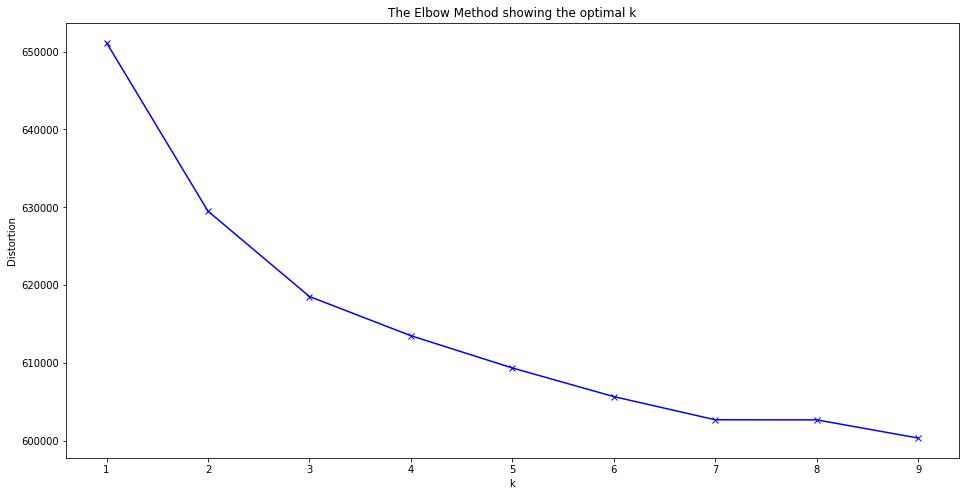

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clean_reviews_train.to_numpy())
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Random Forest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(clean_reviews_train, train_clean_data1['sentiment'])
rf_pred = rf.predict(clean_reviews_test)

In [ ]:
RF_accuracy = accuracy_score(test_clean_data1['sentiment'], rf_pred)
RF_accuracy

0.9774092078924793

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_fit = LR_model.fit(clean_reviews_train, train_clean_data1['sentiment'])
predicts = LR_fit.predict(clean_reviews_test) 

In [ ]:
LR_accuracy = accuracy_score(test_clean_data1['sentiment'], predicts)
LR_accuracy

0.9808407206176722

# Comparison of Algorithms Accuracy 

In [ ]:
print("SVM_accuracy:",SVM_accuracy)
print("KNN_accuracy:",KNN_accuracy)
print("RF_accuracy:",RF_accuracy)
print("LR_accuracy:",LR_accuracy)

SVM_accuracy: 0.9814126394052045
KNN_accuracy: 0.9239348012582214
RF_accuracy: 0.9774092078924793
LR_accuracy: 0.9808407206176722


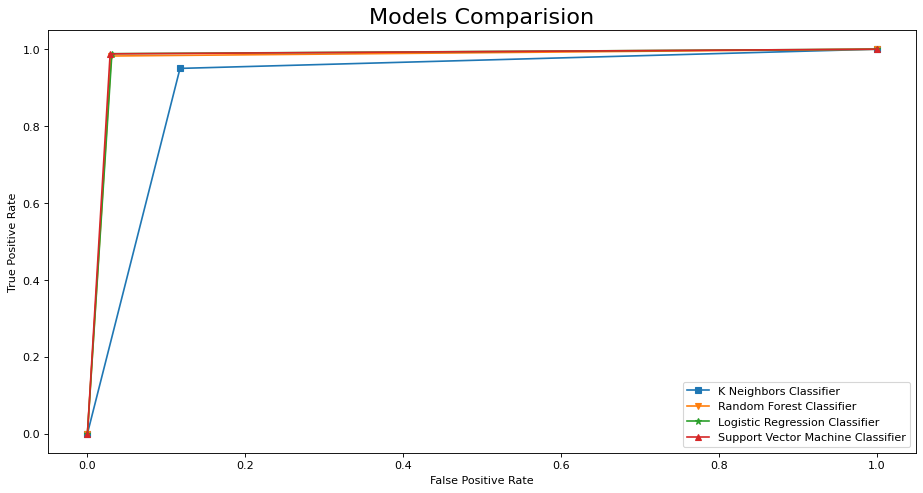

In [ ]:
# accuraccy plot 
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure
result3=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

knn_fpr, knn_tpr, _ = roc_curve(test_clean_data1["sentiment"], kNN_predict)
# nb_fpr, nb_tpr, _ = roc_curve(test_clean_data1["sentiment"], NB_predict)
rf_fpr, rf_tpr, _ = roc_curve(test_clean_data1['sentiment'], rf_pred)
lr_fpr, lr_tpr, _ = roc_curve(test_clean_data1['sentiment'], predicts) 
svm_fpr, svm_tpr, _ = roc_curve(test_clean_data1['sentiment'], prediction_linear)

pyplot.plot(knn_fpr, knn_tpr, marker='s', label='K Neighbors Classifier')
# pyplot.plot(nb_fpr, nb_tpr, marker='o', label='Naive Bayes Classifier')
pyplot.plot(rf_fpr, rf_tpr, marker='v', label='Random Forest Classifier')
pyplot.plot(lr_fpr, lr_tpr, marker='*', label='Logistic Regression Classifier')
pyplot.plot(svm_fpr, svm_tpr, marker='^', label='Support Vector Machine Classifier')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Models Comparision", fontsize=20)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()